# Introduction to pyOpTools

## What is pyOpTools

The pyOpTools package is composed by a set of python modules that allow to simulate the behavior of optical systems.
Initially it was only oriented to the ray tracing, but currently in the development version it has some tools which can be used to simulate optical fields and their propagation.

This tutorial will introduce the simulation of optical systems by ray tracing in a Jupiter notebook.

In the following video there is a small demo of an old version of pyOpTools

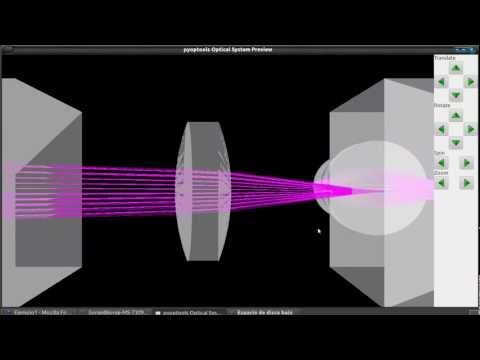

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo("DB8sfm7pVPI",width=640,height=480)

## Some basic characteristics of pyOpTools 

1. It is an open source development
2. It is being developed by the technological development group of [Combustión Ingenieros S.A.S](http://www.cihologramas.com), and the applied optics group of the [Universidad Nacional de Colombia](http://www.unal.edu.co).
3. It is written in [python](http://www.python.org) y [cython](http://www.cython.org).
4. It is written using the [object oriented programming paradigm](https://en.wikipedia.org/wiki/Object-oriented_programming.)
5. It can perform non-sequential ray-tracing of complex 3D systems. 
6. It can be used as a module to develop programs to simulate optical systems. 
7. It can be used in a [Jupyter Notebook](https://www.jupyter.org) to perform interactive simulation tasks 
8. There is a [FreeCAD](https://www.freecadweb.org/) workbench under development, to simplify its applications to optical design tasks. This development is being hosted in https://github.com/cihologramas/freecad-pyoptools 

## A basic introduction 

### Importing pyoptools

The fist step to simulate an optical system in pyOpTools, is to import the package. The most simple way to perform this task is to import the [pyoptools.all](../../pyoptools.all.rst) subpackage:

In [2]:
from pyoptools.all import *

ModuleNotFoundError: No module named 'pyoptools'

After the module is imported, a simulation can be performed. In the following example we will create a simple system composer by a lens, a detector, and a light source. 

As a first step we will create a lens from the Edmund Scientific catalog (reference 32475), we will create a [CCD-like](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.CCD) sensor with 20 mm X 20 mm size, and a parallel ray source with cartesian beam distribution.

<div class="alert alert-info">
    
**Note:** In pyOpTools (unless noted) the units are in millimeters.
    
</div>

In [3]:
L=library.Edmund.get("32475")
SEN=CCD(size=(20,20))
R=parallel_beam_c(origin=(0.0, 0.0, 0.0), direction=(0.0, 0.0, 0.0), 
                  size=(10, 10), num_rays=(5, 5), wavelength=0.58929)

NameError: name 'library' is not defined

with this components created, we will create a system, where the lens is placed at the position (0,0,50) , and the [CCD](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.CCD) is placed at the position (0,0,150). At the end the [Plot3D](../../pyoptools.gui.ipywidgets.rst#pyoptools.gui.ipywidgets.Plot3D) command will be used to show the resulting system.

**Note:** The plot obtained with the Plot3D command is interactive. Meaning you can rotate it (left click), zoom it (scroll wheel), and drag it (right click), by clicking on it and moving the mouse.

In [ ]:
S=System(complist=[(L,(0,0,50),(0,0,0)),(SEN,(0,0,150),(0,0,0))],n=1)
Plot3D(S)

After the system is created, we can add the raysource and propagate the system.

In [ ]:
S.ray_add(R)
S.propagate()
Plot3D(S)

## More Information
[Surfaces in pyOpTools](Surfaces.ipynb)
[Creating components with  pyOpTools](SimpleComponents.ipynb)
[pyOpTools predefined components](PredefinedComponents.ipynb)
[Simple RayTraces](SimpleRayTraces.ipynb)
[Ray-tracing example: Autocolimator](Autocollimator.ipynb)
[Ray-tracing example: Binocular](Binocular.ipynb)

<!--
[Geometrical Wavefront](GeomWF.ipynb)
[[Simple EOD calculations](SimpleEODs.ipynb)
-->
